In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-06-04 07:53:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c15::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   115MB/s    in 1.2s    

2020-06-04 07:53:09 (115 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

In [0]:
zip_file=zipfile.ZipFile('/tmp/horse-or-human.zip','r')


In [0]:
zip_file.extractall('/tmp/horse-or-human')
zip_file.close()

In [0]:
sample_list_dir=os.listdir('/tmp/horse-or-human/horses')

In [13]:
type(sample_list_dir)

list

In [14]:
sample_list_dir[:10]

['horse15-5.png',
 'horse36-3.png',
 'horse14-7.png',
 'horse13-4.png',
 'horse34-3.png',
 'horse35-8.png',
 'horse41-2.png',
 'horse25-7.png',
 'horse48-6.png',
 'horse02-0.png']

In [21]:
os.listdir('/tmp/horse-or-human')

['horses', 'humans']

In [0]:
horse_path=os.path.join('/tmp/horse-or-human','horses')
human_path=os.path.join('/tmp/horse-or-human','humans')

In [0]:
sample_image_path=os.path.join(horse_path,'horse15-5.png')

In [23]:

sample_image_path

'/tmp/horse-or-human/horses/horse15-5.png'

In [0]:
from matplotlib import pyplot as plt

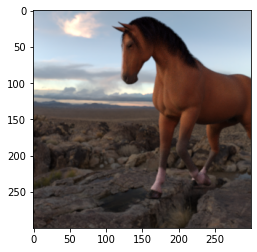

In [31]:
plt.imshow(plt.imread(sample_image_path))

In [32]:
plt.imread(sample_image_path).shape

(300, 300, 4)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
img_gen=ImageDataGenerator(rescale=1/255)

In [53]:
train_fit=img_gen.flow_from_directory('/tmp/horse-or-human',
                                      target_size=(150,150),
                                      batch_size=32,
                                      shuffle=True,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [37]:
horse_gen.class_indices

{'horses': 0, 'humans': 1}

In [40]:
horse_gen.classes.shape

(1027,)

In [0]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow import keras
import numpy as np
import tensorflow as tf

In [60]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),strides=(2,2),padding='SAME',input_shape=(150,150,3),activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(2,2),padding='SAME',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=128,activation=tf.nn.relu))
model.add(Dense(units=1,activation=tf.nn.sigmoid))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 75, 75, 32)        416       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 5, 5, 128)         32896     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 2, 128)        

In [61]:
model.fit(train_fit,epochs=10,shuffle=True)

Epoch 1/10
33/33 [==============================] - 9s 265ms/step - loss: 0.6967 - accuracy: 0.4830
Epoch 2/10
33/33 [==============================] - 9s 268ms/step - loss: 0.6795 - accuracy: 0.5131
Epoch 3/10
33/33 [==============================] - 9s 270ms/step - loss: 0.6029 - accuracy: 0.7644
Epoch 4/10
33/33 [==============================] - 9s 269ms/step - loss: 0.5714 - accuracy: 0.8354
Epoch 5/10
33/33 [==============================] - 9s 268ms/step - loss: 0.5567 - accuracy: 0.8715
Epoch 6/10
33/33 [==============================] - 9s 267ms/step - loss: 0.5358 - accuracy: 0.9260
Epoch 7/10
33/33 [==============================] - 9s 270ms/step - loss: 0.5312 - accuracy: 0.9279
Epoch 8/10
33/33 [==============================] - 9s 267ms/step - loss: 0.5225 - accuracy: 0.9503
Epoch 9/10
33/33 [==============================] - 9s 267ms/step - loss: 0.5162 - accuracy: 0.9649
Epoch 10/10
33/33 [==============================] - 9s 282ms/step - loss: 0.5166 - accuracy: 0.9669